## Question Lab Assignment
**Employ the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.**

### **Task**

1. Identify the variables to be used as independent variables (features) and the target variable (personal medical cost).
2. Partition the dataset into training and testing subsets with an appropriate proportion.
3. Perform feature scaling if required.
4. Construct a multiple linear regression model using Scikit-Learn.
5. Train the model on the training data and perform predictions on the testing data.
6. Evaluate the model by computing metrics such as R-squared, MSE, and MAE. Present the evaluation results.
7. Repeat step 4 using an SVR model. You may experiment by performing hyperparameter tuning.

## Import Libraries and Load DataSet

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Task 1

## Load and Explore Dataset

In [ ]:
# Load the dataset
df = pd.read_csv("insurance.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "=" * 50)
print("First 5 rows of the dataset:")
print("=" * 50)
print(df.head())

Dataset Shape: (1338, 7)

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print("\n" + "=" * 50)
print("Dataset Information:")
print("=" * 50)
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print("\n" + "=" * 50)
print("Statistical Summary:")
print("=" * 50)
print(df.describe())


Statistical Summary:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
print("\n" + "=" * 50)
print("Checking for Missing Values:")
print("=" * 50)
print(df.isnull().sum())


Checking for Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Exploratory Data Analysis - Distribution Plots

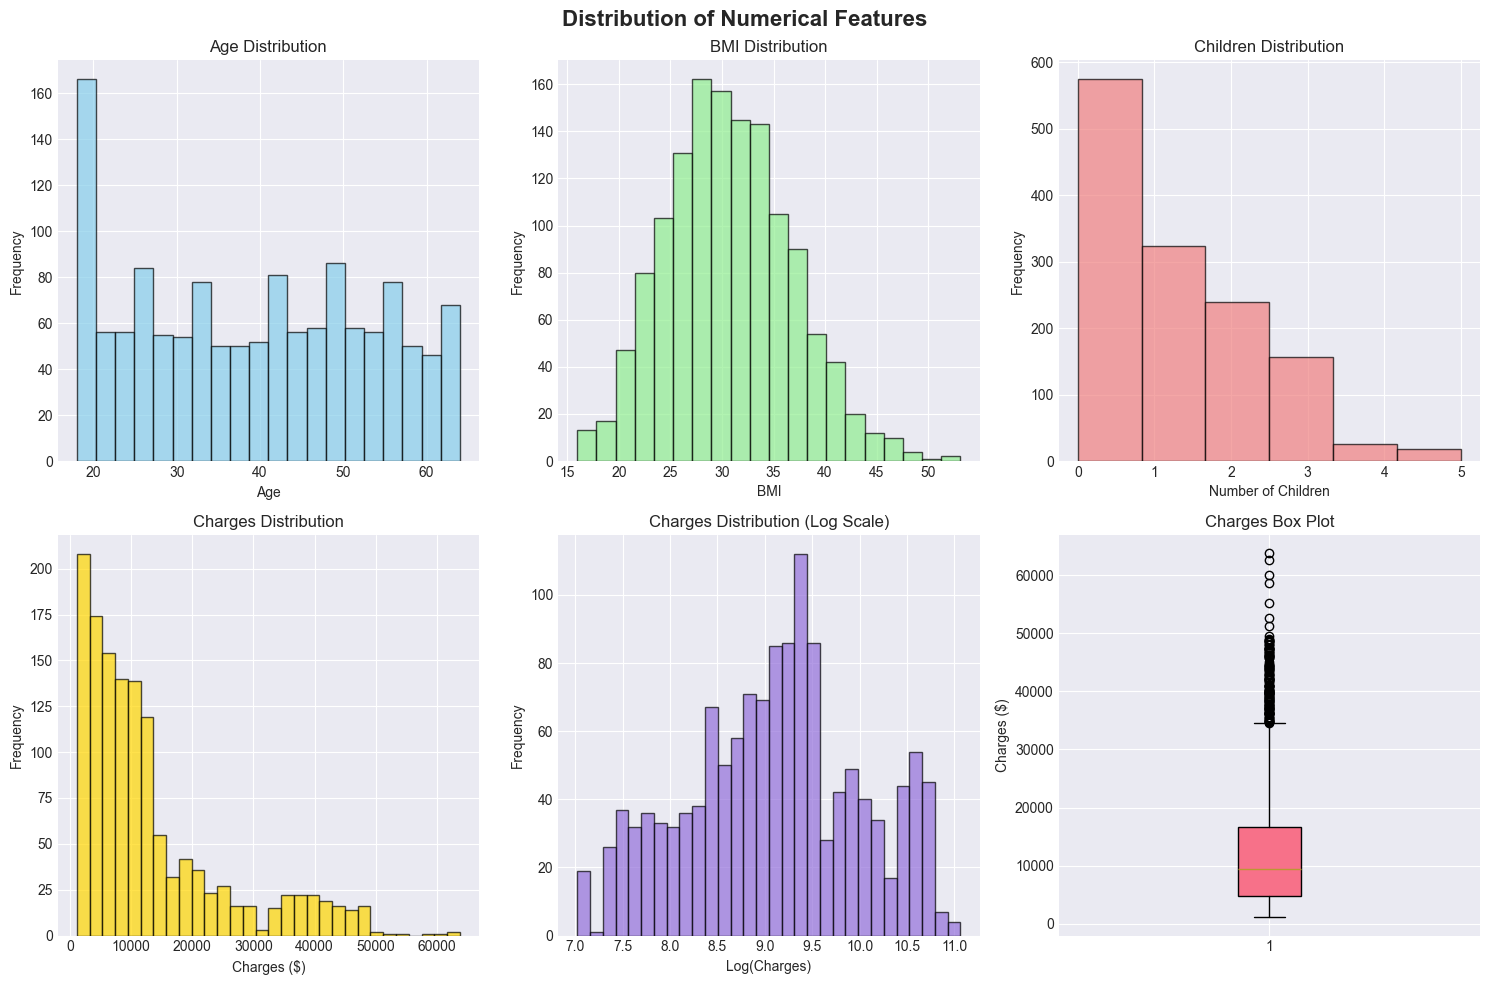

In [7]:
# Visualize distribution of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold")

# Age distribution
axes[0, 0].hist(df["age"], bins=20, color="skyblue", edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# BMI distribution
axes[0, 1].hist(df["bmi"], bins=20, color="lightgreen", edgecolor="black", alpha=0.7)
axes[0, 1].set_title("BMI Distribution")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Frequency")

# Children distribution
axes[0, 2].hist(
    df["children"], bins=6, color="lightcoral", edgecolor="black", alpha=0.7
)
axes[0, 2].set_title("Children Distribution")
axes[0, 2].set_xlabel("Number of Children")
axes[0, 2].set_ylabel("Frequency")

# Charges distribution
axes[1, 0].hist(df["charges"], bins=30, color="gold", edgecolor="black", alpha=0.7)
axes[1, 0].set_title("Charges Distribution")
axes[1, 0].set_xlabel("Charges ($)")
axes[1, 0].set_ylabel("Frequency")

# Charges distribution (log scale)
axes[1, 1].hist(
    np.log(df["charges"]), bins=30, color="mediumpurple", edgecolor="black", alpha=0.7
)
axes[1, 1].set_title("Charges Distribution (Log Scale)")
axes[1, 1].set_xlabel("Log(Charges)")
axes[1, 1].set_ylabel("Frequency")

# Box plot for charges
axes[1, 2].boxplot(df["charges"], vert=True, patch_artist=True)
axes[1, 2].set_title("Charges Box Plot")
axes[1, 2].set_ylabel("Charges ($)")

plt.tight_layout()
plt.show()

## Categorical Feature Analysis 

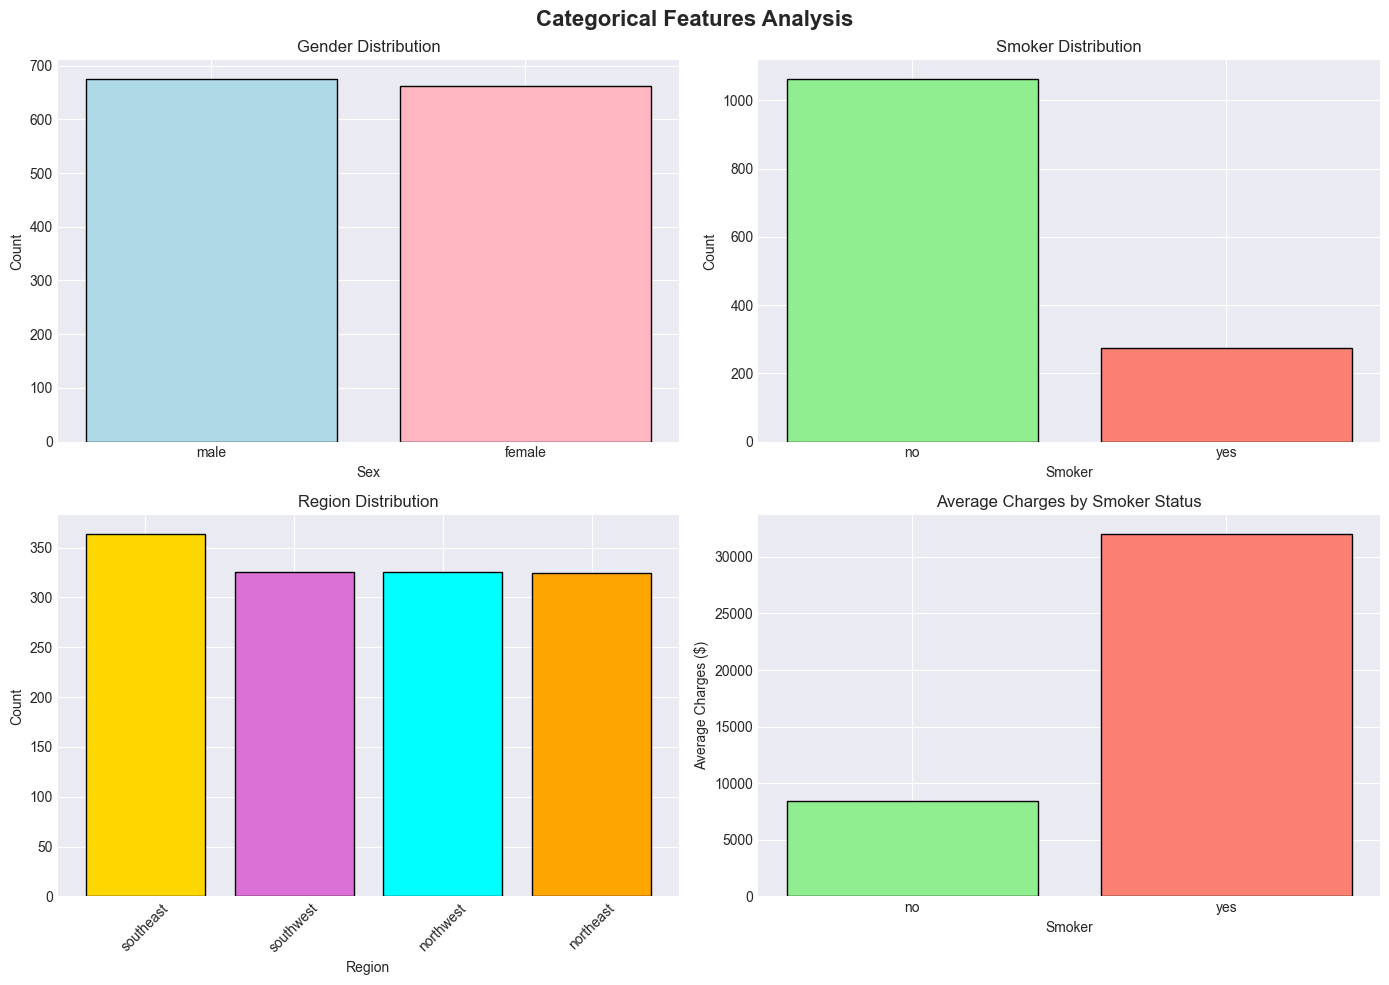

Average Charges by Categorical Features:

By Sex:
                mean      median           std
sex                                           
female  12569.578844  9412.96250  11128.703801
male    13956.751178  9369.61575  12971.025915

By Smoker Status:
                mean       median           std
smoker                                         
no       8434.268298   7345.40530   5993.781819
yes     32050.231832  34456.34845  11541.547176

By Region:
                   mean        median           std
region                                             
northeast  13406.384516  10057.652025  11255.803066
northwest  12417.575374   8965.795750  11072.276928
southeast  14735.411438   9294.131950  13971.098589
southwest  12346.937377   8798.593000  11557.179101


In [8]:
# Analyze categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Categorical Features Analysis", fontsize=16, fontweight="bold")

# Sex distribution
sex_counts = df["sex"].value_counts()
axes[0, 0].bar(
    sex_counts.index,
    sex_counts.values,
    color=["lightblue", "lightpink"],
    edgecolor="black",
)
axes[0, 0].set_title("Gender Distribution")
axes[0, 0].set_xlabel("Sex")
axes[0, 0].set_ylabel("Count")

# Smoker distribution
smoker_counts = df["smoker"].value_counts()
axes[0, 1].bar(
    smoker_counts.index,
    smoker_counts.values,
    color=["lightgreen", "salmon"],
    edgecolor="black",
)
axes[0, 1].set_title("Smoker Distribution")
axes[0, 1].set_xlabel("Smoker")
axes[0, 1].set_ylabel("Count")

# Region distribution
region_counts = df["region"].value_counts()
axes[1, 0].bar(
    region_counts.index,
    region_counts.values,
    color=["gold", "orchid", "cyan", "orange"],
    edgecolor="black",
)
axes[1, 0].set_title("Region Distribution")
axes[1, 0].set_xlabel("Region")
axes[1, 0].set_ylabel("Count")
axes[1, 0].tick_params(axis="x", rotation=45)

# Average charges by smoker status
avg_charges_smoker = df.groupby("smoker")["charges"].mean()
axes[1, 1].bar(
    avg_charges_smoker.index,
    avg_charges_smoker.values,
    color=["lightgreen", "salmon"],
    edgecolor="black",
)
axes[1, 1].set_title("Average Charges by Smoker Status")
axes[1, 1].set_xlabel("Smoker")
axes[1, 1].set_ylabel("Average Charges ($)")

plt.tight_layout()
plt.show()

# Display statistical breakdown
print("=" * 50)
print("Average Charges by Categorical Features:")
print("=" * 50)
print("\nBy Sex:")
print(df.groupby("sex")["charges"].agg(["mean", "median", "std"]))
print("\nBy Smoker Status:")
print(df.groupby("smoker")["charges"].agg(["mean", "median", "std"]))
print("\nBy Region:")
print(df.groupby("region")["charges"].agg(["mean", "median", "std"]))

## Correlation Analysis

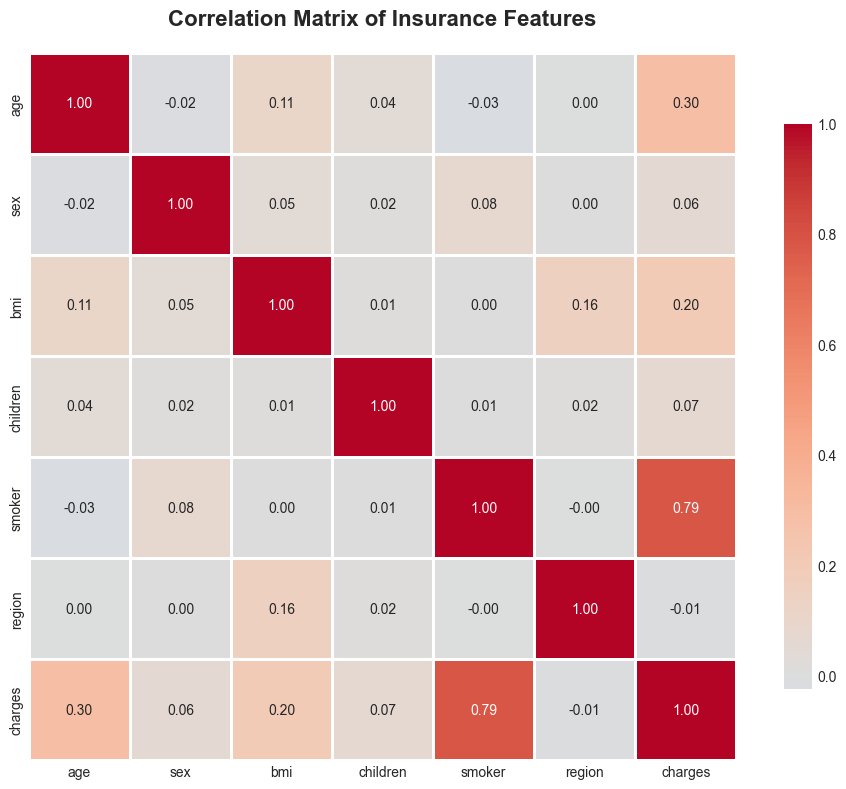

Correlation with Charges (Target Variable):
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


In [9]:
# Create a copy for correlation analysis
df_numeric = df.copy()

# Encode categorical variables for correlation analysis
df_numeric["sex"] = df_numeric["sex"].map({"male": 1, "female": 0})
df_numeric["smoker"] = df_numeric["smoker"].map({"yes": 1, "no": 0})
df_numeric["region"] = df_numeric["region"].map({
    "northeast": 0,
    "northwest": 1,
    "southeast": 2,
    "southwest": 3,
})

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)
plt.title(
    "Correlation Matrix of Insurance Features", fontsize=16, fontweight="bold", pad=20
)
plt.tight_layout()
plt.show()

# Display correlation with target variable
print("=" * 50)
print("Correlation with Charges (Target Variable):")
print("=" * 50)
print(correlation_matrix["charges"].sort_values(ascending=False))


## Feature Relationship With Target

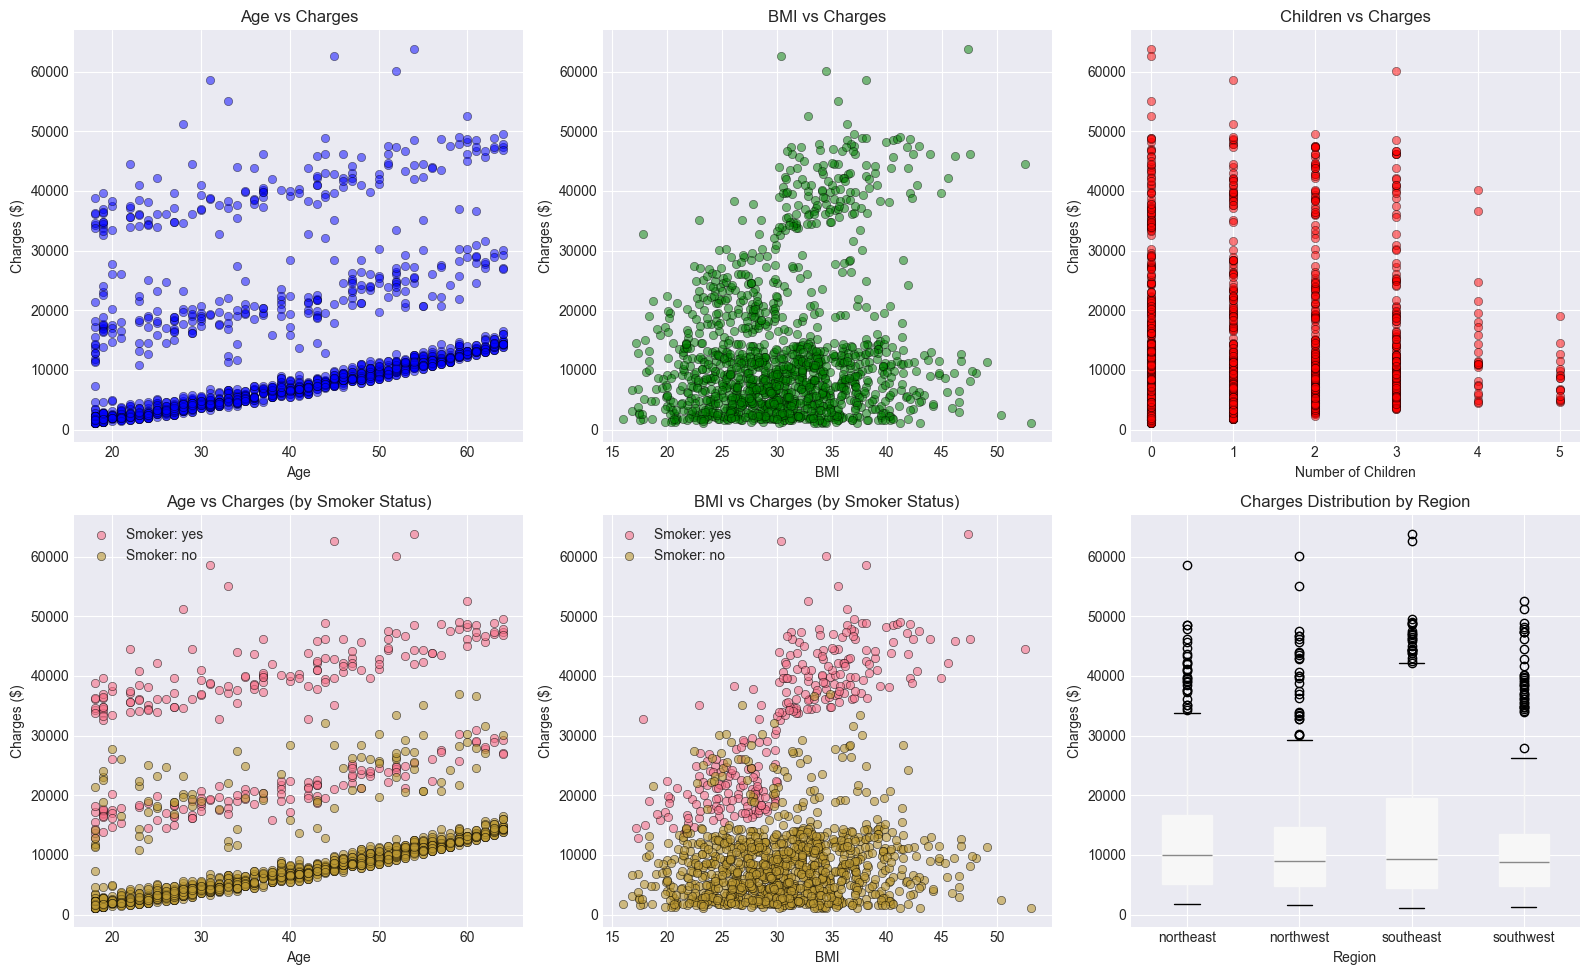

In [10]:
# Scatter plots showing relationship with charges
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Feature Relationships with Charges", fontsize=16, fontweight="bold")

# Age vs Charges
axes[0, 0].scatter(
    df["age"], df["charges"], alpha=0.5, c="blue", edgecolors="black", linewidth=0.5
)
axes[0, 0].set_title("Age vs Charges")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Charges ($)")

# BMI vs Charges
axes[0, 1].scatter(
    df["bmi"], df["charges"], alpha=0.5, c="green", edgecolors="black", linewidth=0.5
)
axes[0, 1].set_title("BMI vs Charges")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Charges ($)")

# Children vs Charges
axes[0, 2].scatter(
    df["children"], df["charges"], alpha=0.5, c="red", edgecolors="black", linewidth=0.5
)
axes[0, 2].set_title("Children vs Charges")
axes[0, 2].set_xlabel("Number of Children")
axes[0, 2].set_ylabel("Charges ($)")

# Age vs Charges (colored by smoker)
for smoker_status in df["smoker"].unique():
    subset = df[df["smoker"] == smoker_status]
    axes[1, 0].scatter(
        subset["age"],
        subset["charges"],
        label=f"Smoker: {smoker_status}",
        alpha=0.6,
        edgecolors="black",
        linewidth=0.5,
    )
axes[1, 0].set_title("Age vs Charges (by Smoker Status)")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Charges ($)")
axes[1, 0].legend()

# BMI vs Charges (colored by smoker)
for smoker_status in df["smoker"].unique():
    subset = df[df["smoker"] == smoker_status]
    axes[1, 1].scatter(
        subset["bmi"],
        subset["charges"],
        label=f"Smoker: {smoker_status}",
        alpha=0.6,
        edgecolors="black",
        linewidth=0.5,
    )
axes[1, 1].set_title("BMI vs Charges (by Smoker Status)")
axes[1, 1].set_xlabel("BMI")
axes[1, 1].set_ylabel("Charges ($)")
axes[1, 1].legend()

# Box plot: Charges by Region
df.boxplot(column="charges", by="region", ax=axes[1, 2], patch_artist=True)
axes[1, 2].set_title("Charges Distribution by Region")
axes[1, 2].set_xlabel("Region")
axes[1, 2].set_ylabel("Charges ($)")
plt.suptitle("")  # Remove the automatic title

plt.tight_layout()
plt.show()

## Data Preprocessing and Encoding Categorical Variables

In [11]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Display original categorical values
print("=" * 50)
print("Original Categorical Variables:")
print("=" * 50)
print(f"Sex unique values: {df_processed['sex'].unique()}")
print(f"Smoker unique values: {df_processed['smoker'].unique()}")
print(f"Region unique values: {df_processed['region'].unique()}")

# Encode binary categorical variables
df_processed["sex"] = df_processed["sex"].map({"male": 1, "female": 0})
df_processed["smoker"] = df_processed["smoker"].map({"yes": 1, "no": 0})

# One-hot encoding for region (multi-category variable)
df_processed = pd.get_dummies(
    df_processed, columns=["region"], prefix="region", drop_first=True
)

print("\n" + "=" * 50)
print("After Encoding:")
print("=" * 50)
print(df_processed.head())
print("\n" + "=" * 50)
print("New Shape:", df_processed.shape)
print("New Columns:", df_processed.columns.tolist())

Original Categorical Variables:
Sex unique values: ['female' 'male']
Smoker unique values: ['yes' 'no']
Region unique values: ['southwest' 'southeast' 'northwest' 'northeast']

After Encoding:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

New Shape: (1338, 9)
New Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'region_northwest', 'region_southeast', 'reg

## Separate Features and Target

In [ ]:
# Separate features (X) and target variable (y)
X = df_processed.drop("charges", axis=1)
y = df_processed["charges"]

print("=" * 50)
print("Features (X) and Target (y) Separation:")
print("=" * 50)
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print("\n" + "=" * 50)
print("Feature names:")
print("=" * 50)
print(X.columns.tolist())
print("\n" + "=" * 50)
print("First 5 rows of features (X):")
print("=" * 50)
print(X.head())


Features (X) and Target (y) Separation:
Feature matrix shape: (1338, 8)
Target vector shape: (1338,)

Feature names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']

First 5 rows of features (X):
   age  sex     bmi  children  smoker  region_northwest  region_southeast  \
0   19    0  27.900         0       1             False             False   
1   18    1  33.770         1       0             False              True   
2   28    1  33.000         3       0             False              True   
3   33    1  22.705         0       0              True             False   
4   32    1  28.880         0       0              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False  

First 5 values of target (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Target

In [13]:
print("\n" + "=" * 50)
print("First 5 values of target (y):")
print("=" * 50)
print(y.head())
print("\n" + "=" * 50)
print("Target variable statistics:")
print("=" * 50)
print(y.describe())


First 5 values of target (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Target variable statistics:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


# Task 2

## Train Test-Split

Train-Test Split Results:
Training set size: 1070 samples (80.0%)
Testing set size: 268 samples (20.0%)

Training features shape: (1070, 8)
Training target shape: (1070,)
Testing features shape: (268, 8)
Testing target shape: (268,)

Training set statistics:
count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

Testing set statistics:
count      268.000000
mean     12968.317063
std      12483.196202
min       1131.506600
25%       4288.744850
50%       8487.880300
75%      16367.829375
max      63770.428010
Name: charges, dtype: float64


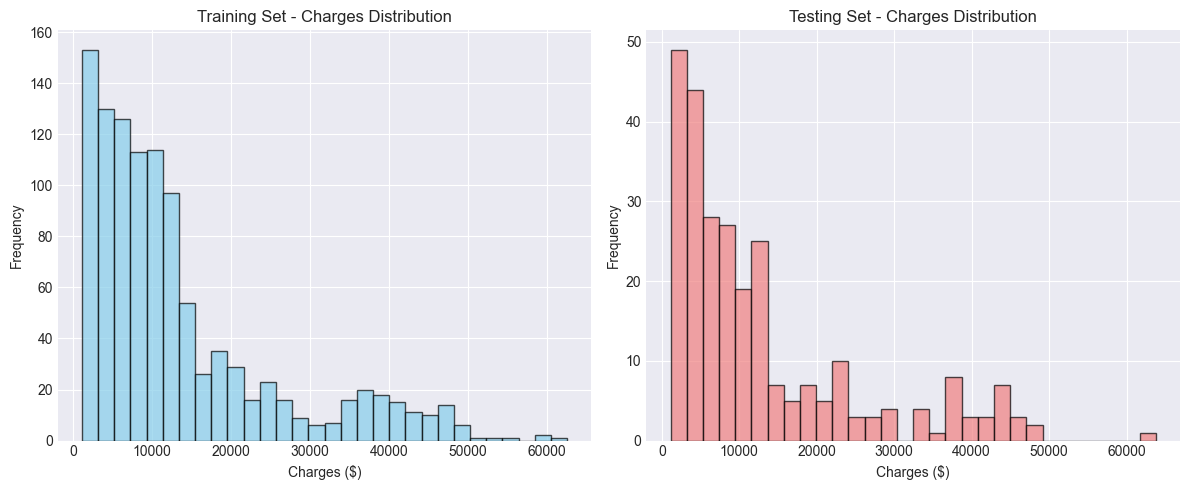

In [14]:
# Split the data into training and testing sets
# Using 80-20 split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 50)
print("Train-Test Split Results:")
print("=" * 50)
print(
    f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0] / len(X) * 100:.1f}%)"
)
print(
    f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0] / len(X) * 100:.1f}%)"
)
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing target shape: {y_test.shape}")

print("\n" + "=" * 50)
print("Training set statistics:")
print("=" * 50)
print(y_train.describe())

print("\n" + "=" * 50)
print("Testing set statistics:")
print("=" * 50)
print(y_test.describe())

# Visualize the split
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(y_train, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
axes[0].set_title("Training Set - Charges Distribution")
axes[0].set_xlabel("Charges ($)")
axes[0].set_ylabel("Frequency")

axes[1].hist(y_test, bins=30, color="lightcoral", edgecolor="black", alpha=0.7)
axes[1].set_title("Testing Set - Charges Distribution")
axes[1].set_xlabel("Charges ($)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Task 3

## Feature Scaling

Feature Scaling Results:
Scaled training features shape: (1070, 8)
Scaled testing features shape: (268, 8)

Before Scaling (Training Set - First 5 rows):
      age  sex    bmi  children  smoker  region_northwest  region_southeast  \
560    46    0  19.95         2       0              True             False   
1285   47    0  24.32         0       0             False             False   
1142   52    0  24.86         0       0             False              True   
969    39    0  34.32         5       0             False              True   
486    54    0  21.47         3       0              True             False   

      region_southwest  
560              False  
1285             False  
1142             False  
969              False  
486              False  

After Scaling (Training Set - First 5 rows):
        age       sex       bmi  children    smoker  region_northwest  \
0  0.472227 -1.024602 -1.756525  0.734336 -0.508747          1.783168   
1  0.543313 -1.024602 -1.0330

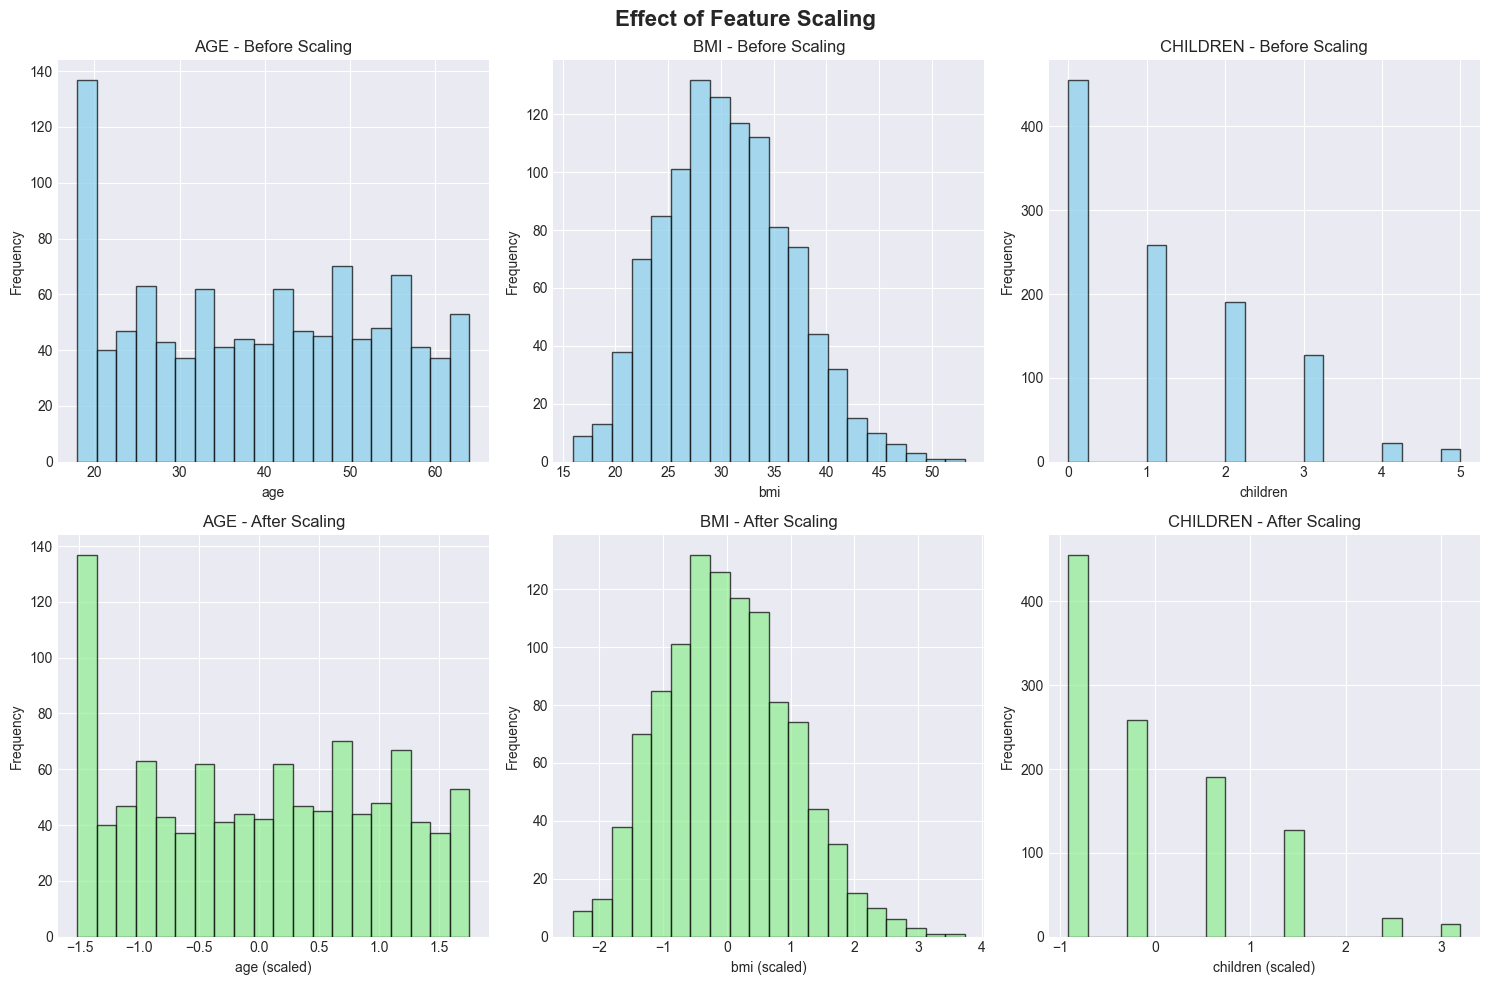

In [15]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("=" * 50)
print("Feature Scaling Results:")
print("=" * 50)
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

print("\n" + "=" * 50)
print("Before Scaling (Training Set - First 5 rows):")
print("=" * 50)
print(X_train.head())

print("\n" + "=" * 50)
print("After Scaling (Training Set - First 5 rows):")
print("=" * 50)
print(X_train_scaled_df.head())

print("\n" + "=" * 50)
print("Training Set - Feature Statistics After Scaling:")
print("=" * 50)
print(X_train_scaled_df.describe())

# Visualize the effect of scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Effect of Feature Scaling", fontsize=16, fontweight="bold")

features_to_plot = ["age", "bmi", "children"]
for idx, feature in enumerate(features_to_plot):
    # Before scaling
    axes[0, idx].hist(
        X_train[feature], bins=20, color="skyblue", edgecolor="black", alpha=0.7
    )
    axes[0, idx].set_title(f"{feature.upper()} - Before Scaling")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    # After scaling
    axes[1, idx].hist(
        X_train_scaled_df[feature],
        bins=20,
        color="lightgreen",
        edgecolor="black",
        alpha=0.7,
    )
    axes[1, idx].set_title(f"{feature.upper()} - After Scaling")
    axes[1, idx].set_xlabel(f"{feature} (scaled)")
    axes[1, idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Task 4 - Multiple Linear Regression

## Construct and Train Multiple Linear Models

Multiple Linear Regression Model Training Complete

Model Intercept: $13,346.09

Model Coefficients (Feature Importance):
         Feature  Coefficient
          smoker  9558.481409
             age  3614.975415
             bmi  2036.228123
        children   516.890247
             sex    -9.293101
region_northwest  -158.140981
region_southeast  -290.157047
region_southwest  -349.110678


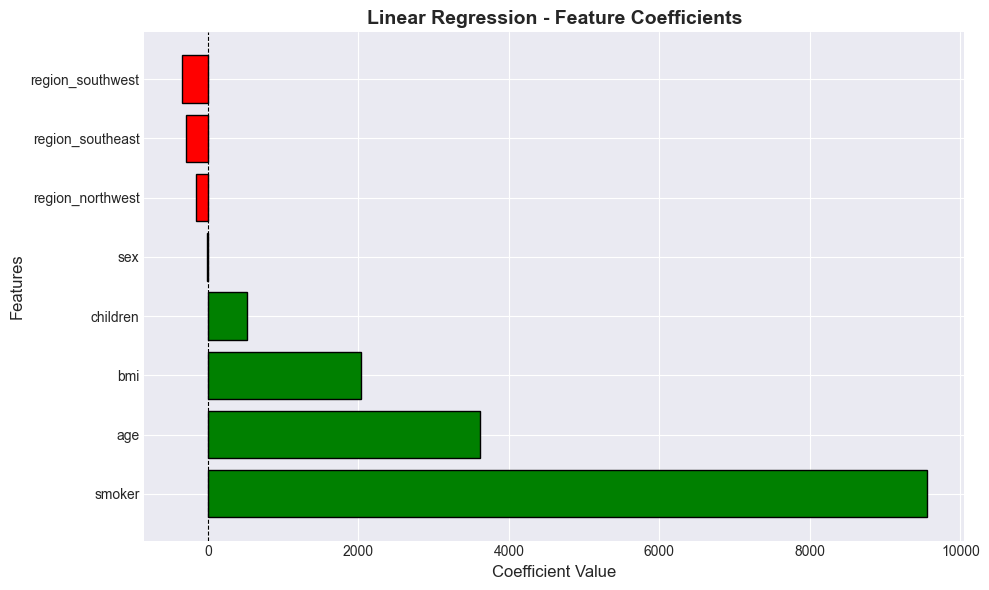

In [16]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train_scaled, y_train)

# Display model parameters
print("=" * 50)
print("Multiple Linear Regression Model Training Complete")
print("=" * 50)
print(f"\nModel Intercept: ${lr_model.intercept_:,.2f}")
print("\n" + "=" * 50)
print("Model Coefficients (Feature Importance):")
print("=" * 50)

# Create a DataFrame for better visualization of coefficients
coefficients_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_,
}).sort_values("Coefficient", ascending=False)

print(coefficients_df.to_string(index=False))

# Visualize feature coefficients
plt.figure(figsize=(10, 6))
colors = ["green" if c > 0 else "red" for c in coefficients_df["Coefficient"]]
plt.barh(
    coefficients_df["Feature"],
    coefficients_df["Coefficient"],
    color=colors,
    edgecolor="black",
)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Linear Regression - Feature Coefficients", fontsize=14, fontweight="bold")
plt.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
plt.tight_layout()
plt.show()


# Task 5 - Multiple Linear Regression

## Predictions in Multiple Linear Regression

Linear Regression - Predictions Summary:
Number of training predictions: 1070
Number of testing predictions: 268

Sample Predictions vs Actual Values (Test Set):
     Actual    Predicted   Difference     Error %
 9095.06825  8969.550274   125.517976    1.380066
 5272.17580  7068.747443 -1796.571643  -34.076475
29330.98315 36858.410912 -7527.427762  -25.663742
 9301.89355  9454.678501  -152.784951   -1.642515
33750.29180 26973.173457  6777.118343   20.080177
 4536.25900 10864.113164 -6327.854164 -139.494993
 2117.33885   170.280841  1947.058009   91.957790
14210.53595 16903.450287 -2692.914337  -18.950125
 3732.62510  1092.430936  2640.194164   70.732905
10264.44210 11218.343184  -953.901084   -9.293258


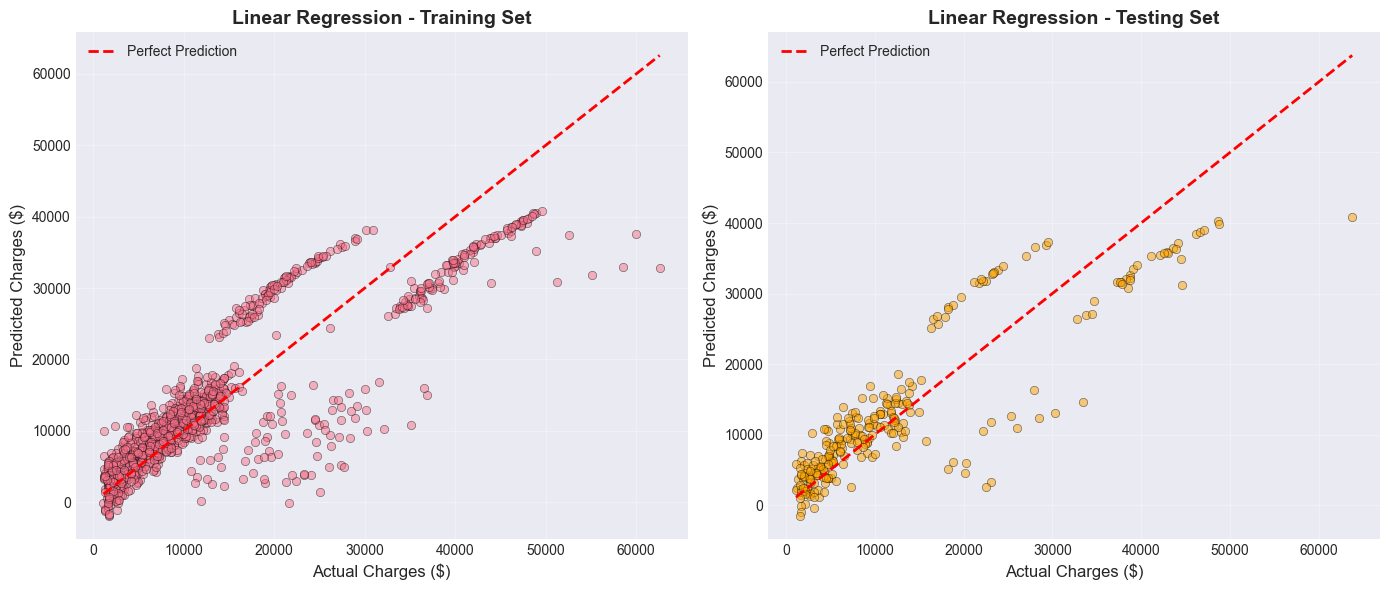

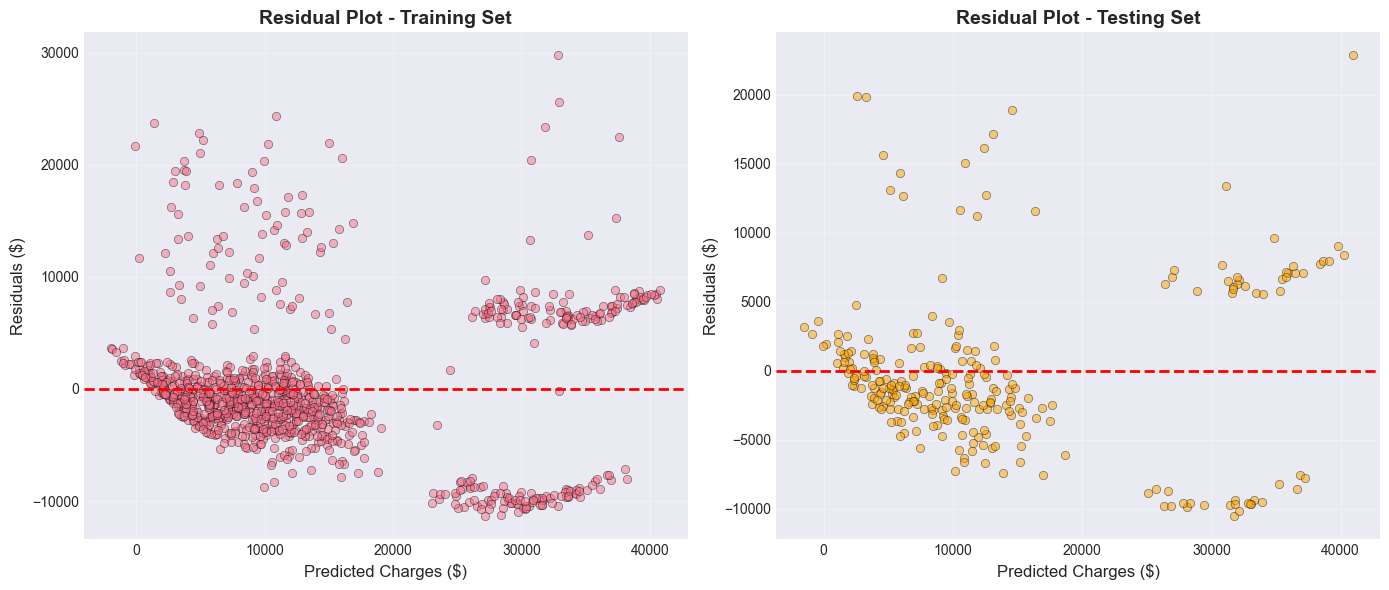

In [17]:
# Make predictions on both training and testing sets
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

print("="*50)
print("Linear Regression - Predictions Summary:")
print("="*50)
print(f"Number of training predictions: {len(y_train_pred_lr)}")
print(f"Number of testing predictions: {len(y_test_pred_lr)}")

print("\n" + "="*50)
print("Sample Predictions vs Actual Values (Test Set):")
print("="*50)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_test_pred_lr[:10],
    'Difference': y_test.values[:10] - y_test_pred_lr[:10],
    'Error %': ((y_test.values[:10] - y_test_pred_lr[:10]) / y_test.values[:10] * 100)
})
print(comparison_df.to_string(index=False))

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train, y_train_pred_lr, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Charges ($)', fontsize=12)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[0].set_title('Linear Regression - Training Set', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred_lr, alpha=0.5, color='orange', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Charges ($)', fontsize=12)
axes[1].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[1].set_title('Linear Regression - Testing Set', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plot (errors)
residuals_train = y_train - y_train_pred_lr
residuals_test = y_test - y_test_pred_lr

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training residuals
axes[0].scatter(y_train_pred_lr, residuals_train, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Charges ($)', fontsize=12)
axes[0].set_ylabel('Residuals ($)', fontsize=12)
axes[0].set_title('Residual Plot - Training Set', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Testing residuals
axes[1].scatter(y_test_pred_lr, residuals_test, alpha=0.5, color='orange', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Charges ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Residual Plot - Testing Set', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 6 - Multiple Linear Regression

## Evaluate Linear Regression Model

LINEAR REGRESSION MODEL - EVALUATION METRICS

TRAINING SET PERFORMANCE:
R² Score (R-squared):           0.7417 (74.17%)
Mean Squared Error (MSE):       $37,277,681.70
Root Mean Squared Error (RMSE): $6,105.55
Mean Absolute Error (MAE):      $4,208.23

TESTING SET PERFORMANCE:
R² Score (R-squared):           0.7836 (78.36%)
Mean Squared Error (MSE):       $33,596,915.85
Root Mean Squared Error (RMSE): $5,796.28
Mean Absolute Error (MAE):      $4,181.19

PERFORMANCE COMPARISON:
R² Difference (Train - Test):   -0.0419
RMSE Difference (Train - Test): $309.26
MAE Difference (Train - Test):  $27.04


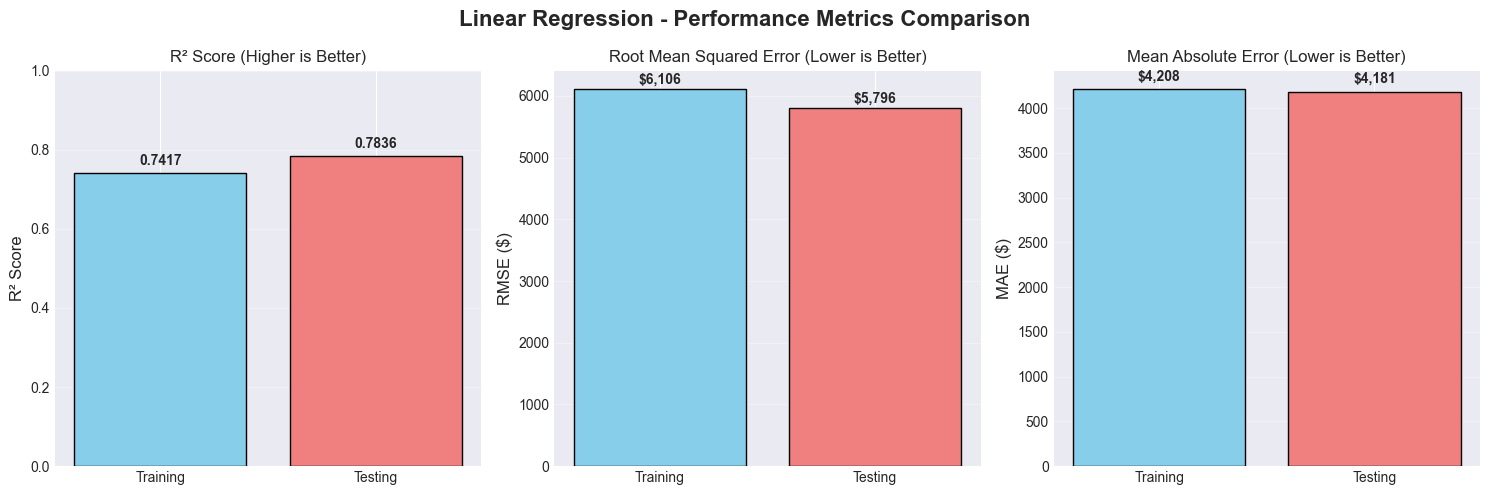

In [18]:
# Calculate evaluation metrics for Linear Regression

# Training set metrics
r2_train_lr = r2_score(y_train, y_train_pred_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)

# Testing set metrics
r2_test_lr = r2_score(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Display results
print("=" * 70)
print("LINEAR REGRESSION MODEL - EVALUATION METRICS")
print("=" * 70)

print("\n" + "=" * 70)
print("TRAINING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_train_lr:.4f} ({r2_train_lr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_train_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_lr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_train_lr:,.2f}")

print("\n" + "=" * 70)
print("TESTING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_test_lr:.4f} ({r2_test_lr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_test_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_lr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_test_lr:,.2f}")

print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON:")
print("=" * 70)
print(f"R² Difference (Train - Test):   {r2_train_lr - r2_test_lr:.4f}")
print(f"RMSE Difference (Train - Test): ${rmse_train_lr - rmse_test_lr:,.2f}")
print(f"MAE Difference (Train - Test):  ${mae_train_lr - mae_test_lr:,.2f}")

# Visualize metrics comparison
metrics_comparison = {
    "Metric": ["R² Score", "RMSE ($)", "MAE ($)"],
    "Training": [r2_train_lr, rmse_train_lr, mae_train_lr],
    "Testing": [r2_test_lr, rmse_test_lr, mae_test_lr],
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(
    "Linear Regression - Performance Metrics Comparison", fontsize=16, fontweight="bold"
)

# R² Score
axes[0].bar(
    ["Training", "Testing"],
    [r2_train_lr, r2_test_lr],
    color=["skyblue", "lightcoral"],
    edgecolor="black",
)
axes[0].set_ylabel("R² Score", fontsize=12)
axes[0].set_title("R² Score (Higher is Better)", fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].grid(axis="y", alpha=0.3)
for i, v in enumerate([r2_train_lr, r2_test_lr]):
    axes[0].text(i, v + 0.02, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

# RMSE
axes[1].bar(
    ["Training", "Testing"],
    [rmse_train_lr, rmse_test_lr],
    color=["skyblue", "lightcoral"],
    edgecolor="black",
)
axes[1].set_ylabel("RMSE ($)", fontsize=12)
axes[1].set_title("Root Mean Squared Error (Lower is Better)", fontsize=12)
axes[1].grid(axis="y", alpha=0.3)
for i, v in enumerate([rmse_train_lr, rmse_test_lr]):
    axes[1].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# MAE
axes[2].bar(
    ["Training", "Testing"],
    [mae_train_lr, mae_test_lr],
    color=["skyblue", "lightcoral"],
    edgecolor="black",
)
axes[2].set_ylabel("MAE ($)", fontsize=12)
axes[2].set_title("Mean Absolute Error (Lower is Better)", fontsize=12)
axes[2].grid(axis="y", alpha=0.3)
for i, v in enumerate([mae_train_lr, mae_test_lr]):
    axes[2].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

# Task 4 - SVR Models

## Construct and Train SVR Models

In [19]:
# Initialize SVR model with RBF kernel (default)
svr_model = SVR(kernel="rbf", C=1.0, gamma="scale", epsilon=0.1)

print("=" * 50)
print("Training SVR Model...")
print("=" * 50)
print("SVR Parameters:")
print(f"  - Kernel: {svr_model.kernel}")
print(f"  - C (Regularization): {svr_model.C}")
print(f"  - Gamma: {svr_model.gamma}")
print(f"  - Epsilon: {svr_model.epsilon}")
print("\nTraining in progress... (this may take a moment)")

# Train the SVR model
svr_model.fit(X_train_scaled, y_train)

print("\n✓ SVR Model training complete!")

print("\n" + "=" * 50)
print("SVR Model Information:")
print("=" * 50)
print(f"Number of support vectors: {len(svr_model.support_)}")
print(f"Support vector indices shape: {svr_model.support_.shape}")


Training SVR Model...
SVR Parameters:
  - Kernel: rbf
  - C (Regularization): 1.0
  - Gamma: scale
  - Epsilon: 0.1

Training in progress... (this may take a moment)

✓ SVR Model training complete!

SVR Model Information:
Number of support vectors: 1070
Support vector indices shape: (1070,)


# Task 5 - SVR Models

## Prediction in SVR Models

SVR - Predictions Summary:
Number of training predictions: 1070
Number of testing predictions: 268

Sample Predictions vs Actual Values (Test Set):
     Actual   Predicted   Difference     Error %
 9095.06825 9557.280739  -462.212489   -5.082012
 5272.17580 9542.939133 -4270.763333  -81.005708
29330.98315 9626.033174 19704.949976   67.181348
 9301.89355 9566.917756  -265.024206   -2.849143
33750.29180 9595.518594 24154.773206   71.569080
 4536.25900 9561.224579 -5024.965579 -110.773339
 2117.33885 9528.466017 -7411.127167 -350.020837
14210.53595 9607.858301  4602.677649   32.389191
 3732.62510 9534.450612 -5801.825512 -155.435527
10264.44210 9574.615185   689.826915    6.720550


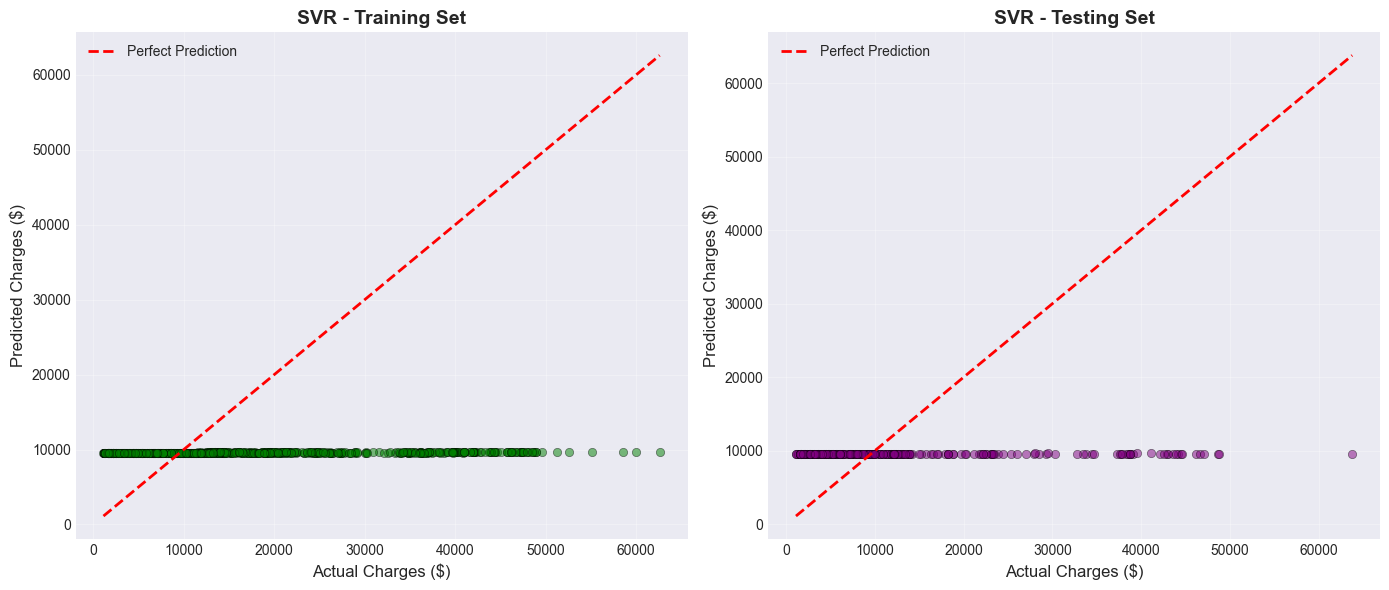

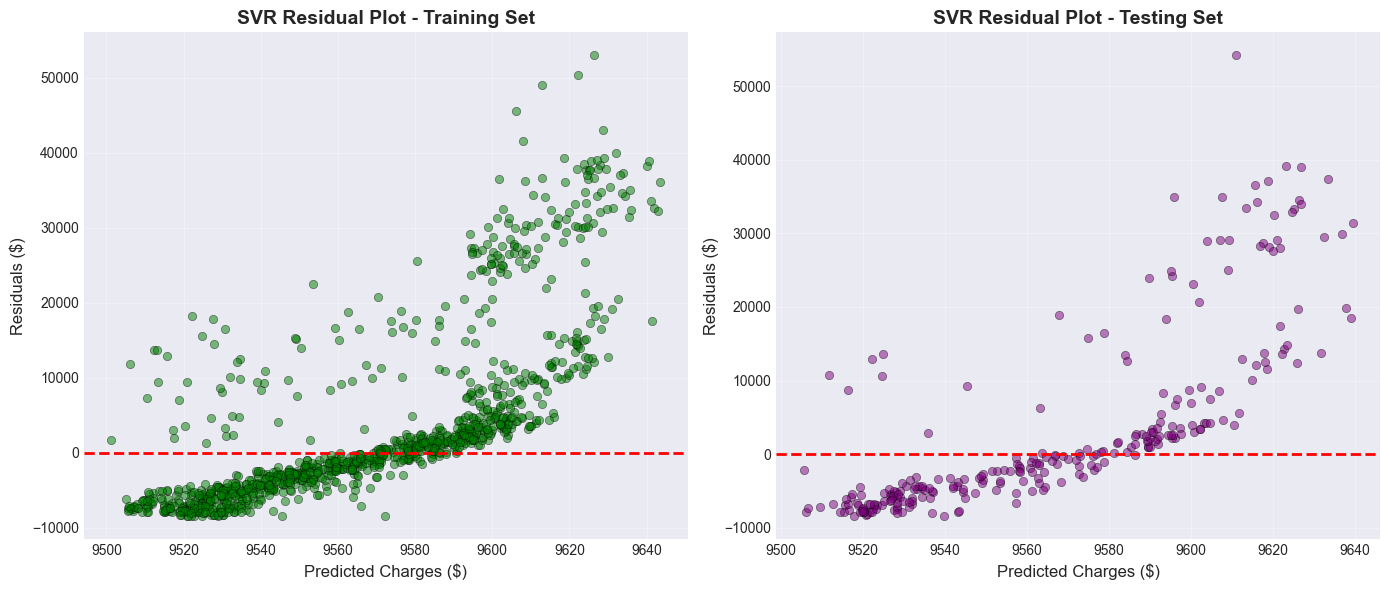

In [20]:
# Make predictions with SVR model
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

print("=" * 50)
print("SVR - Predictions Summary:")
print("=" * 50)
print(f"Number of training predictions: {len(y_train_pred_svr)}")
print(f"Number of testing predictions: {len(y_test_pred_svr)}")

print("\n" + "=" * 50)
print("Sample Predictions vs Actual Values (Test Set):")
print("=" * 50)

# Create comparison DataFrame for SVR
comparison_svr_df = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_test_pred_svr[:10],
    "Difference": y_test.values[:10] - y_test_pred_svr[:10],
    "Error %": ((y_test.values[:10] - y_test_pred_svr[:10]) / y_test.values[:10] * 100),
})
print(comparison_svr_df.to_string(index=False))

# Visualize SVR predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(
    y_train,
    y_train_pred_svr,
    alpha=0.5,
    color="green",
    edgecolors="black",
    linewidth=0.5,
)
axes[0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[0].set_xlabel("Actual Charges ($)", fontsize=12)
axes[0].set_ylabel("Predicted Charges ($)", fontsize=12)
axes[0].set_title("SVR - Training Set", fontsize=14, fontweight="bold")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(
    y_test,
    y_test_pred_svr,
    alpha=0.5,
    color="purple",
    edgecolors="black",
    linewidth=0.5,
)
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[1].set_xlabel("Actual Charges ($)", fontsize=12)
axes[1].set_ylabel("Predicted Charges ($)", fontsize=12)
axes[1].set_title("SVR - Testing Set", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plots for SVR
residuals_train_svr = y_train - y_train_pred_svr
residuals_test_svr = y_test - y_test_pred_svr

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training residuals
axes[0].scatter(
    y_train_pred_svr,
    residuals_train_svr,
    alpha=0.5,
    color="green",
    edgecolors="black",
    linewidth=0.5,
)
axes[0].axhline(y=0, color="r", linestyle="--", lw=2)
axes[0].set_xlabel("Predicted Charges ($)", fontsize=12)
axes[0].set_ylabel("Residuals ($)", fontsize=12)
axes[0].set_title("SVR Residual Plot - Training Set", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# Testing residuals
axes[1].scatter(
    y_test_pred_svr,
    residuals_test_svr,
    alpha=0.5,
    color="purple",
    edgecolors="black",
    linewidth=0.5,
)
axes[1].axhline(y=0, color="r", linestyle="--", lw=2)
axes[1].set_xlabel("Predicted Charges ($)", fontsize=12)
axes[1].set_ylabel("Residuals ($)", fontsize=12)
axes[1].set_title("SVR Residual Plot - Testing Set", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Task 6 - SVR Models 

## Evaluating SVR Models

SUPPORT VECTOR REGRESSION (SVR) MODEL - EVALUATION METRICS

TRAINING SET PERFORMANCE:
R² Score (R-squared):           -0.0946 (-9.46%)
Mean Squared Error (MSE):       $157,982,187.73
Root Mean Squared Error (RMSE): $12,569.10
Mean Absolute Error (MAE):      $8,253.92

TESTING SET PERFORMANCE:
R² Score (R-squared):           -0.0701 (-7.01%)
Mean Squared Error (MSE):       $166,128,803.81
Root Mean Squared Error (RMSE): $12,889.10
Mean Absolute Error (MAE):      $8,612.41

PERFORMANCE COMPARISON:
R² Difference (Train - Test):   -0.0245
RMSE Difference (Train - Test): $-320.00
MAE Difference (Train - Test):  $-358.48


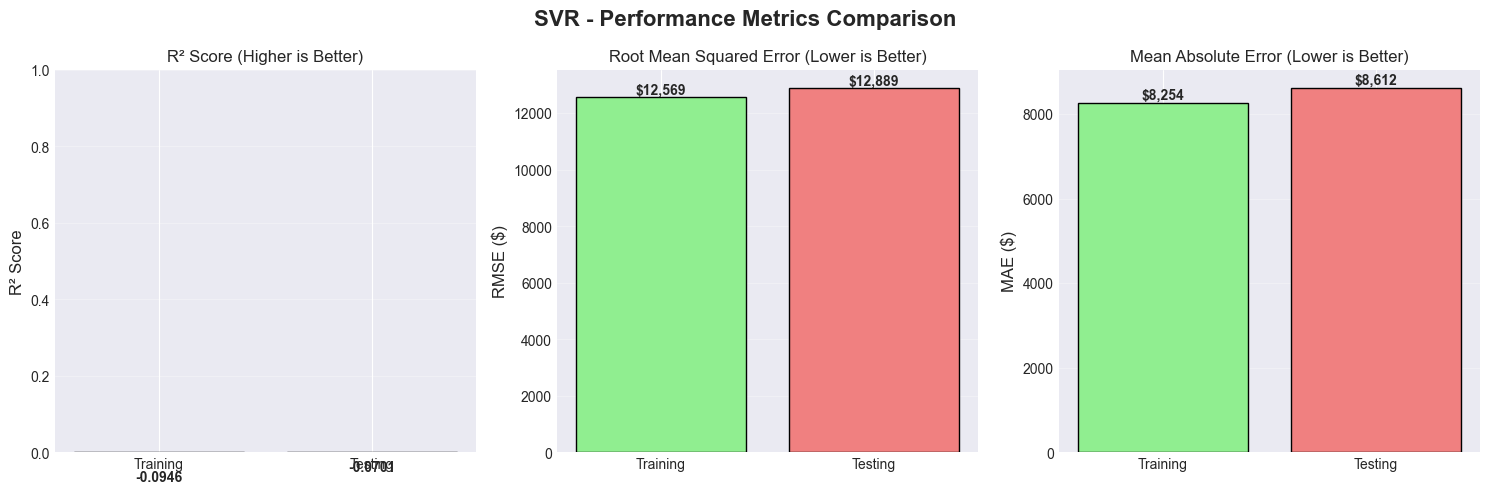

In [21]:
# Calculate evaluation metrics for SVR

# Training set metrics
r2_train_svr = r2_score(y_train, y_train_pred_svr)
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)

# Testing set metrics
r2_test_svr = r2_score(y_test, y_test_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)

# Display results
print("=" * 70)
print("SUPPORT VECTOR REGRESSION (SVR) MODEL - EVALUATION METRICS")
print("=" * 70)

print("\n" + "=" * 70)
print("TRAINING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_train_svr:.4f} ({r2_train_svr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_train_svr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_svr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_train_svr:,.2f}")

print("\n" + "=" * 70)
print("TESTING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_test_svr:.4f} ({r2_test_svr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_test_svr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_svr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_test_svr:,.2f}")

print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON:")
print("=" * 70)
print(f"R² Difference (Train - Test):   {r2_train_svr - r2_test_svr:.4f}")
print(f"RMSE Difference (Train - Test): ${rmse_train_svr - rmse_test_svr:,.2f}")
print(f"MAE Difference (Train - Test):  ${mae_train_svr - mae_test_svr:,.2f}")

# Visualize metrics comparison for SVR
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("SVR - Performance Metrics Comparison", fontsize=16, fontweight="bold")

# R² Score
axes[0].bar(
    ["Training", "Testing"],
    [r2_train_svr, r2_test_svr],
    color=["lightgreen", "lightcoral"],
    edgecolor="black",
)
axes[0].set_ylabel("R² Score", fontsize=12)
axes[0].set_title("R² Score (Higher is Better)", fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].grid(axis="y", alpha=0.3)
for i, v in enumerate([r2_train_svr, r2_test_svr]):
    axes[0].text(i, v + 0.02, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

# RMSE
axes[1].bar(
    ["Training", "Testing"],
    [rmse_train_svr, rmse_test_svr],
    color=["lightgreen", "lightcoral"],
    edgecolor="black",
)
axes[1].set_ylabel("RMSE ($)", fontsize=12)
axes[1].set_title("Root Mean Squared Error (Lower is Better)", fontsize=12)
axes[1].grid(axis="y", alpha=0.3)
for i, v in enumerate([rmse_train_svr, rmse_test_svr]):
    axes[1].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# MAE
axes[2].bar(
    ["Training", "Testing"],
    [mae_train_svr, mae_test_svr],
    color=["lightgreen", "lightcoral"],
    edgecolor="black",
)
axes[2].set_ylabel("MAE ($)", fontsize=12)
axes[2].set_title("Mean Absolute Error (Lower is Better)", fontsize=12)
axes[2].grid(axis="y", alpha=0.3)
for i, v in enumerate([mae_train_svr, mae_test_svr]):
    axes[2].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

## Comparing Multiple Linear Regression Models VS SVR Non Hyper Parameter (GridSearch)

MODEL COMPARISON: LINEAR REGRESSION vs SUPPORT VECTOR REGRESSION

TESTING SET PERFORMANCE (Most Important):
  Metric Linear Regression            SVR      Difference     Winner
R² Score            0.7836        -0.0701         -0.8537 Linear Reg
MSE ($²)     33,596,915.85 166,128,803.81 +132,531,887.96 Linear Reg
RMSE ($)          5,796.28      12,889.10       +7,092.81 Linear Reg
 MAE ($)          4,181.19       8,612.41       +4,431.21 Linear Reg

TRAINING SET PERFORMANCE:
  Metric Linear Regression       SVR
R² Score            0.7417   -0.0946
RMSE ($)          6,105.55 12,569.10
 MAE ($)          4,208.23  8,253.92

PERCENTAGE IMPROVEMENT (SVR vs Linear Regression):
R² Score improvement:  -108.94%
RMSE reduction:        -122.37%
MAE reduction:         -105.98%


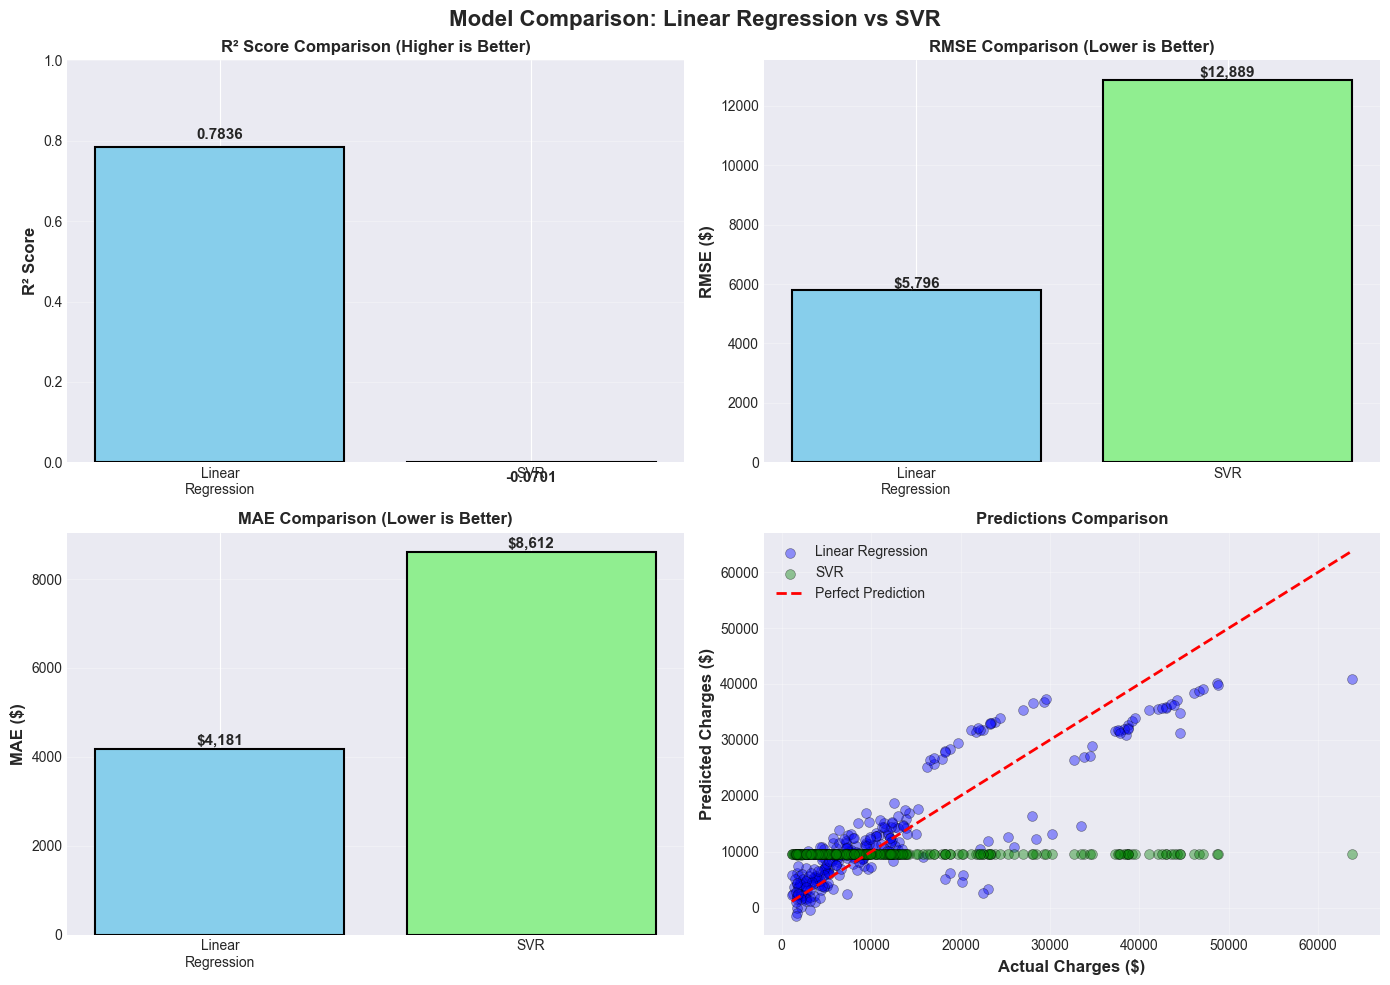

In [24]:
# Create comprehensive comparison
print("="*80)
print("MODEL COMPARISON: LINEAR REGRESSION vs SUPPORT VECTOR REGRESSION")
print("="*80)

print("\n" + "="*80)
print("TESTING SET PERFORMANCE (Most Important):")
print("="*80)

comparison_data = {
    'Metric': ['R² Score', 'MSE ($²)', 'RMSE ($)', 'MAE ($)'],
    'Linear Regression': [
        f'{r2_test_lr:.4f}',
        f'{mse_test_lr:,.2f}',
        f'{rmse_test_lr:,.2f}',
        f'{mae_test_lr:,.2f}'
    ],
    'SVR': [
        f'{r2_test_svr:.4f}',
        f'{mse_test_svr:,.2f}',
        f'{rmse_test_svr:,.2f}',
        f'{mae_test_svr:,.2f}'
    ],
    'Difference': [
        f'{r2_test_svr - r2_test_lr:+.4f}',
        f'{mse_test_svr - mse_test_lr:+,.2f}',
        f'{rmse_test_svr - rmse_test_lr:+,.2f}',
        f'{mae_test_svr - mae_test_lr:+,.2f}'
    ],
    'Winner': [
        'SVR' if r2_test_svr > r2_test_lr else 'Linear Reg',
        'SVR' if mse_test_svr < mse_test_lr else 'Linear Reg',
        'SVR' if rmse_test_svr < rmse_test_lr else 'Linear Reg',
        'SVR' if mae_test_svr < mae_test_lr else 'Linear Reg'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("TRAINING SET PERFORMANCE:")
print("="*80)

training_comparison_data = {
    'Metric': ['R² Score', 'RMSE ($)', 'MAE ($)'],
    'Linear Regression': [
        f'{r2_train_lr:.4f}',
        f'{rmse_train_lr:,.2f}',
        f'{mae_train_lr:,.2f}'
    ],
    'SVR': [
        f'{r2_train_svr:.4f}',
        f'{rmse_train_svr:,.2f}',
        f'{mae_train_svr:,.2f}'
    ]
}

training_comparison_df = pd.DataFrame(training_comparison_data)
print(training_comparison_df.to_string(index=False))

# Calculate performance improvement
r2_improvement = ((r2_test_svr - r2_test_lr) / r2_test_lr) * 100
rmse_improvement = ((rmse_test_lr - rmse_test_svr) / rmse_test_lr) * 100
mae_improvement = ((mae_test_lr - mae_test_svr) / mae_test_lr) * 100

print("\n" + "="*80)
print("PERCENTAGE IMPROVEMENT (SVR vs Linear Regression):")
print("="*80)
print(f"R² Score improvement:  {r2_improvement:+.2f}%")
print(f"RMSE reduction:        {rmse_improvement:+.2f}%")
print(f"MAE reduction:         {mae_improvement:+.2f}%")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison: Linear Regression vs SVR', fontsize=16, fontweight='bold')

# R² Comparison
models = ['Linear\nRegression', 'SVR']
r2_scores = [r2_test_lr, r2_test_svr]
colors_r2 = ["skyblue", "lightgreen"]
axes[0, 0].bar(models, r2_scores, color=colors_r2, edgecolor="black", linewidth=1.5)
axes[0, 0].set_ylabel("R² Score", fontsize=12, fontweight="bold")
axes[0, 0].set_title(
    "R² Score Comparison (Higher is Better)", fontsize=12, fontweight="bold"
)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(r2_scores):
    axes[0, 0].text(
        i, v + 0.02, f"{v:.4f}", ha="center", fontsize=11, fontweight="bold"
    )

# RMSE Comparison
rmse_scores = [rmse_test_lr, rmse_test_svr]
axes[0, 1].bar(models, rmse_scores, color=colors_r2, edgecolor="black", linewidth=1.5)
axes[0, 1].set_ylabel("RMSE ($)", fontsize=12, fontweight="bold")
axes[0, 1].set_title(
    "RMSE Comparison (Lower is Better)", fontsize=12, fontweight="bold"
)
axes[0, 1].grid(axis="y", alpha=0.3)
for i, v in enumerate(rmse_scores):
    axes[0, 1].text(
        i, v + 100, f"${v:,.0f}", ha="center", fontsize=11, fontweight="bold"
    )

# MAE Comparison
mae_scores = [mae_test_lr, mae_test_svr]
axes[1, 0].bar(models, mae_scores, color=colors_r2, edgecolor="black", linewidth=1.5)
axes[1, 0].set_ylabel("MAE ($)", fontsize=12, fontweight="bold")
axes[1, 0].set_title("MAE Comparison (Lower is Better)", fontsize=12, fontweight="bold")
axes[1, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(mae_scores):
    axes[1, 0].text(
        i, v + 100, f"${v:,.0f}", ha="center", fontsize=11, fontweight="bold"
    )

# Side-by-side predictions scatter
axes[1, 1].scatter(
    y_test,
    y_test_pred_lr,
    alpha=0.4,
    label="Linear Regression",
    color="blue",
    edgecolors="black",
    linewidth=0.5,
    s=50,
)
axes[1, 1].scatter(
    y_test,
    y_test_pred_svr,
    alpha=0.4,
    label="SVR",
    color="green",
    edgecolors="black",
    linewidth=0.5,
    s=50,
)
axes[1, 1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[1, 1].set_xlabel("Actual Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_ylabel("Predicted Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_title("Predictions Comparison", fontsize=12, fontweight="bold")
axes[1, 1].legend(loc="upper left")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Determining Overall Performances

In [ ]:
# Determine overall winner
print("\n" + "=" * 80)
print("OVERALL MODEL RECOMMENDATION:")
print("=" * 80)

if r2_test_svr > r2_test_lr and rmse_test_svr < rmse_test_lr:
    print("WINNER: Support Vector Regression (SVR)")
    print("Reason: SVR shows better performance on both R² and RMSE metrics.")
elif r2_test_lr > r2_test_svr and rmse_test_lr < rmse_test_svr:
    print("WINNER: Linear Regression")
    print("Reason: Linear Regression shows better performance and is simpler.")
else:
    print("RESULT: Mixed Performance")
    print("Reason: Each model has advantages in different metrics.")
    print("Consider using both models and ensemble their predictions.")



OVERALL MODEL RECOMMENDATION:
WINNER: Linear Regression
Reason: Linear Regression shows better performance and is simpler.


# Task 4-5 SVR Models (Hyperparameter Tuning)

In [ ]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print("=" * 70)
print("SVR HYPERPARAMETER TUNING - GRID SEARCH")
print("=" * 70)
print("\nSearching for optimal hyperparameters...")
print("This may take several minutes depending on your system.\n")

# Define parameter grid to search
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1],
    "epsilon": [0.01, 0.1, 0.2, 0.5],
}

print("Parameter grid to explore:")
print(f"  - C (Regularization): {param_grid['C']}")
print(f"  - Gamma: {param_grid['gamma']}")
print(f"  - Epsilon: {param_grid['epsilon']}")
print(
    f"\nTotal combinations to test: {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['epsilon'])}"
)

# Initialize SVR for grid search
svr_grid = SVR(kernel="rbf")

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=svr_grid,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Optimize for R² score
    n_jobs=-1,  # Use all available cores
    verbose=1,
)

# Fit grid search
print("\n" + "=" * 70)
print("Starting Grid Search...")
print("=" * 70)
grid_search.fit(X_train_scaled, y_train)

print("\n" + "=" * 70)
print("GRID SEARCH RESULTS:")
print("=" * 70)
print(f"Best R² Score (Cross-Validation): {grid_search.best_score_:.4f}")
print(f"\nBest Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"  - {param}: {value}")

# Get the best model
best_svr_model = grid_search.best_estimator_

SVR HYPERPARAMETER TUNING - GRID SEARCH

Searching for optimal hyperparameters...
This may take several minutes depending on your system.

Parameter grid to explore:
  - C (Regularization): [0.1, 1, 10, 100]
  - Gamma: ['scale', 'auto', 0.001, 0.01, 0.1]
  - Epsilon: [0.01, 0.1, 0.2, 0.5]

Total combinations to test: 80

Starting Grid Search...
Fitting 5 folds for each of 80 candidates, totalling 400 fits

GRID SEARCH RESULTS:
Best R² Score (Cross-Validation): 0.1716

Best Parameters Found:
  - C: 100
  - epsilon: 0.5
  - gamma: 0.1

Top 5 Parameter Combinations:

Rank 1:
  Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 2:
  Parameters: {'C': 100, 'epsilon': 0.2, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 3:
  Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 4:
  Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 5:
  Parameters: {'

In [27]:
print("\n" + "=" * 70)
print("Top 5 Parameter Combinations:")
print("=" * 70)

# Display top 5 results
results_df = pd.DataFrame(grid_search.cv_results_)
top_5 = results_df.nlargest(5, "mean_test_score")[
    ["params", "mean_test_score", "std_test_score"]
]
for idx, row in top_5.iterrows():
    print(f"\nRank {top_5.index.get_loc(idx) + 1}:")
    print(f"  Parameters: {row['params']}")
    print(
        f"  Mean CV R² Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})"
    )



Top 5 Parameter Combinations:

Rank 1:
  Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 2:
  Parameters: {'C': 100, 'epsilon': 0.2, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 3:
  Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 4:
  Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 5:
  Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto'}
  Mean CV R² Score: 0.1509 (±0.0429)


# Task 6 - SVR Models (Hyperparameter Tuning)

## Evaluate Tuned SVR Models


TUNED SVR MODEL - EVALUATION METRICS

TRAINING SET PERFORMANCE:
R² Score (R-squared):           0.2344 (23.44%)
Mean Squared Error (MSE):       $110,501,796.84
Root Mean Squared Error (RMSE): $10,511.98
Mean Absolute Error (MAE):      $5,602.83

TESTING SET PERFORMANCE:
R² Score (R-squared):           0.2697 (26.97%)
Mean Squared Error (MSE):       $113,376,007.82
Root Mean Squared Error (RMSE): $10,647.82
Mean Absolute Error (MAE):      $5,695.15

IMPROVEMENT FROM HYPERPARAMETER TUNING:
R² improvement over basic SVR:     0.3398 (-484.86%)
RMSE reduction from basic SVR:     $2,241.28 (+17.39%)
MAE reduction from basic SVR:      $2,917.26 (+33.87%)

R² improvement over Linear Reg:    -0.5139 (-65.58%)
RMSE reduction from Linear Reg:    $-4,851.53 (-83.70%)
MAE reduction from Linear Reg:     $-1,513.96 (-36.21%)


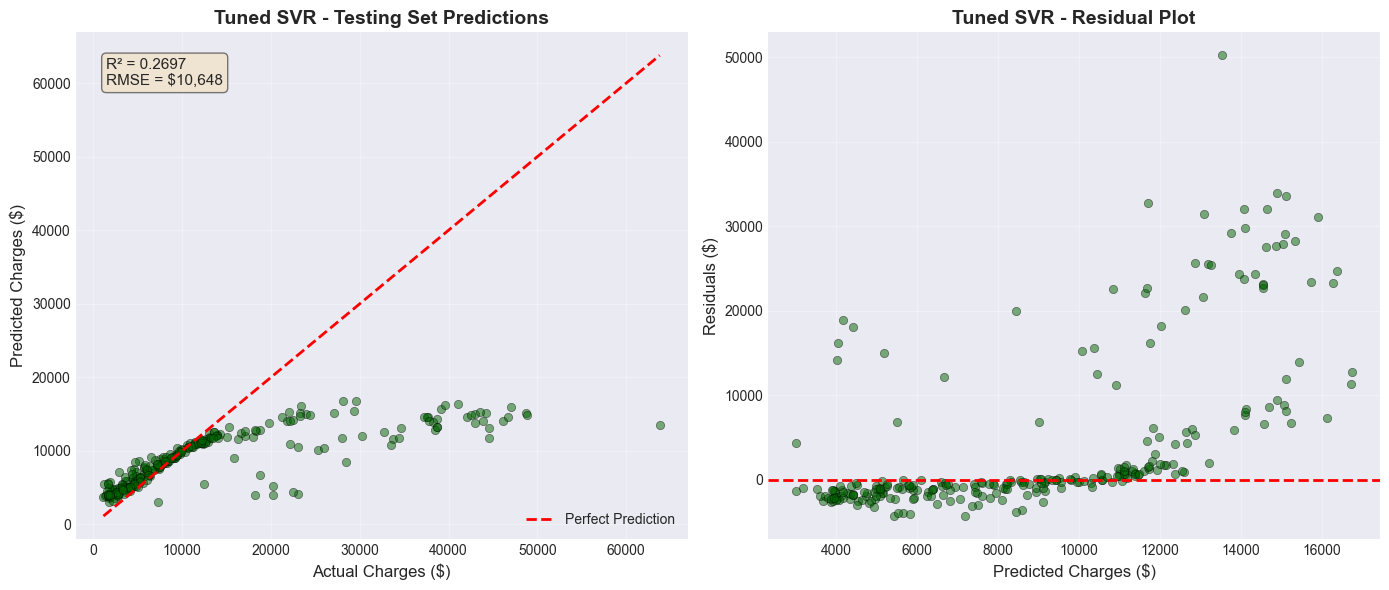


MODEL COMPLEXITY COMPARISON:
Basic SVR - Support Vectors:  1070
Tuned SVR - Support Vectors:  1070
Difference:                   +0


In [28]:
# Make predictions with tuned SVR model
y_train_pred_tuned = best_svr_model.predict(X_train_scaled)
y_test_pred_tuned = best_svr_model.predict(X_test_scaled)

# Calculate evaluation metrics for Tuned SVR
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)
mse_train_tuned = mean_squared_error(y_train, y_train_pred_tuned)
rmse_train_tuned = np.sqrt(mse_train_tuned)
mae_train_tuned = mean_absolute_error(y_train, y_train_pred_tuned)

r2_test_tuned = r2_score(y_test, y_test_pred_tuned)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
rmse_test_tuned = np.sqrt(mse_test_tuned)
mae_test_tuned = mean_absolute_error(y_test, y_test_pred_tuned)

# Display results
print("\n" + "=" * 70)
print("TUNED SVR MODEL - EVALUATION METRICS")
print("=" * 70)

print("\n" + "=" * 70)
print("TRAINING SET PERFORMANCE:")
print("=" * 70)
print(
    f"R² Score (R-squared):           {r2_train_tuned:.4f} ({r2_train_tuned * 100:.2f}%)"
)
print(f"Mean Squared Error (MSE):       ${mse_train_tuned:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_tuned:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_train_tuned:,.2f}")

print("\n" + "=" * 70)
print("TESTING SET PERFORMANCE:")
print("=" * 70)
print(
    f"R² Score (R-squared):           {r2_test_tuned:.4f} ({r2_test_tuned * 100:.2f}%)"
)
print(f"Mean Squared Error (MSE):       ${mse_test_tuned:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_tuned:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_test_tuned:,.2f}")

# Compare with previous models
print("\n" + "=" * 70)
print("IMPROVEMENT FROM HYPERPARAMETER TUNING:")
print("=" * 70)
print(
    f"R² improvement over basic SVR:     {(r2_test_tuned - r2_test_svr):.4f} ({((r2_test_tuned - r2_test_svr) / r2_test_svr) * 100:+.2f}%)"
)
print(
    f"RMSE reduction from basic SVR:     ${(rmse_test_svr - rmse_test_tuned):,.2f} ({((rmse_test_svr - rmse_test_tuned) / rmse_test_svr) * 100:+.2f}%)"
)
print(
    f"MAE reduction from basic SVR:      ${(mae_test_svr - mae_test_tuned):,.2f} ({((mae_test_svr - mae_test_tuned) / mae_test_svr) * 100:+.2f}%)"
)

print("\n" + "=" * 70)
print(
    f"R² improvement over Linear Reg:    {(r2_test_tuned - r2_test_lr):.4f} ({((r2_test_tuned - r2_test_lr) / r2_test_lr) * 100:+.2f}%)"
)
print(
    f"RMSE reduction from Linear Reg:    ${(rmse_test_lr - rmse_test_tuned):,.2f} ({((rmse_test_lr - rmse_test_tuned) / rmse_test_lr) * 100:+.2f}%)"
)
print(
    f"MAE reduction from Linear Reg:     ${(mae_test_lr - mae_test_tuned):,.2f} ({((mae_test_lr - mae_test_tuned) / mae_test_lr) * 100:+.2f}%)"
)

# Visualize tuned SVR predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Predictions scatter plot
axes[0].scatter(
    y_test,
    y_test_pred_tuned,
    alpha=0.5,
    color="darkgreen",
    edgecolors="black",
    linewidth=0.5,
)
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[0].set_xlabel("Actual Charges ($)", fontsize=12)
axes[0].set_ylabel("Predicted Charges ($)", fontsize=12)
axes[0].set_title("Tuned SVR - Testing Set Predictions", fontsize=14, fontweight="bold")
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(
    0.05,
    0.95,
    f"R² = {r2_test_tuned:.4f}\nRMSE = ${rmse_test_tuned:,.0f}",
    transform=axes[0].transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
)

# Residuals plot
residuals_tuned = y_test - y_test_pred_tuned
axes[1].scatter(
    y_test_pred_tuned,
    residuals_tuned,
    alpha=0.5,
    color="darkgreen",
    edgecolors="black",
    linewidth=0.5,
)
axes[1].axhline(y=0, color="r", linestyle="--", lw=2)
axes[1].set_xlabel("Predicted Charges ($)", fontsize=12)
axes[1].set_ylabel("Residuals ($)", fontsize=12)
axes[1].set_title("Tuned SVR - Residual Plot", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Number of support vectors comparison
print("\n" + "=" * 70)
print("MODEL COMPLEXITY COMPARISON:")
print("=" * 70)
print(f"Basic SVR - Support Vectors:  {len(svr_model.support_)}")
print(f"Tuned SVR - Support Vectors:  {len(best_svr_model.support_)}")
print(
    f"Difference:                   {len(best_svr_model.support_) - len(svr_model.support_):+d}"
)

## Final Model Comparison

FINAL MODEL COMPARISON: ALL THREE MODELS

       Metric Linear Regression  Basic SVR          Tuned SVR
     R² Score            0.7836    -0.0701             0.2697
     RMSE ($)         $5,796.28 $12,889.10         $10,647.82
      MAE ($)         $4,181.19  $8,612.41          $5,695.15
Training Time         Very Fast   Moderate Slow (Grid Search)
   Complexity               Low     Medium               High


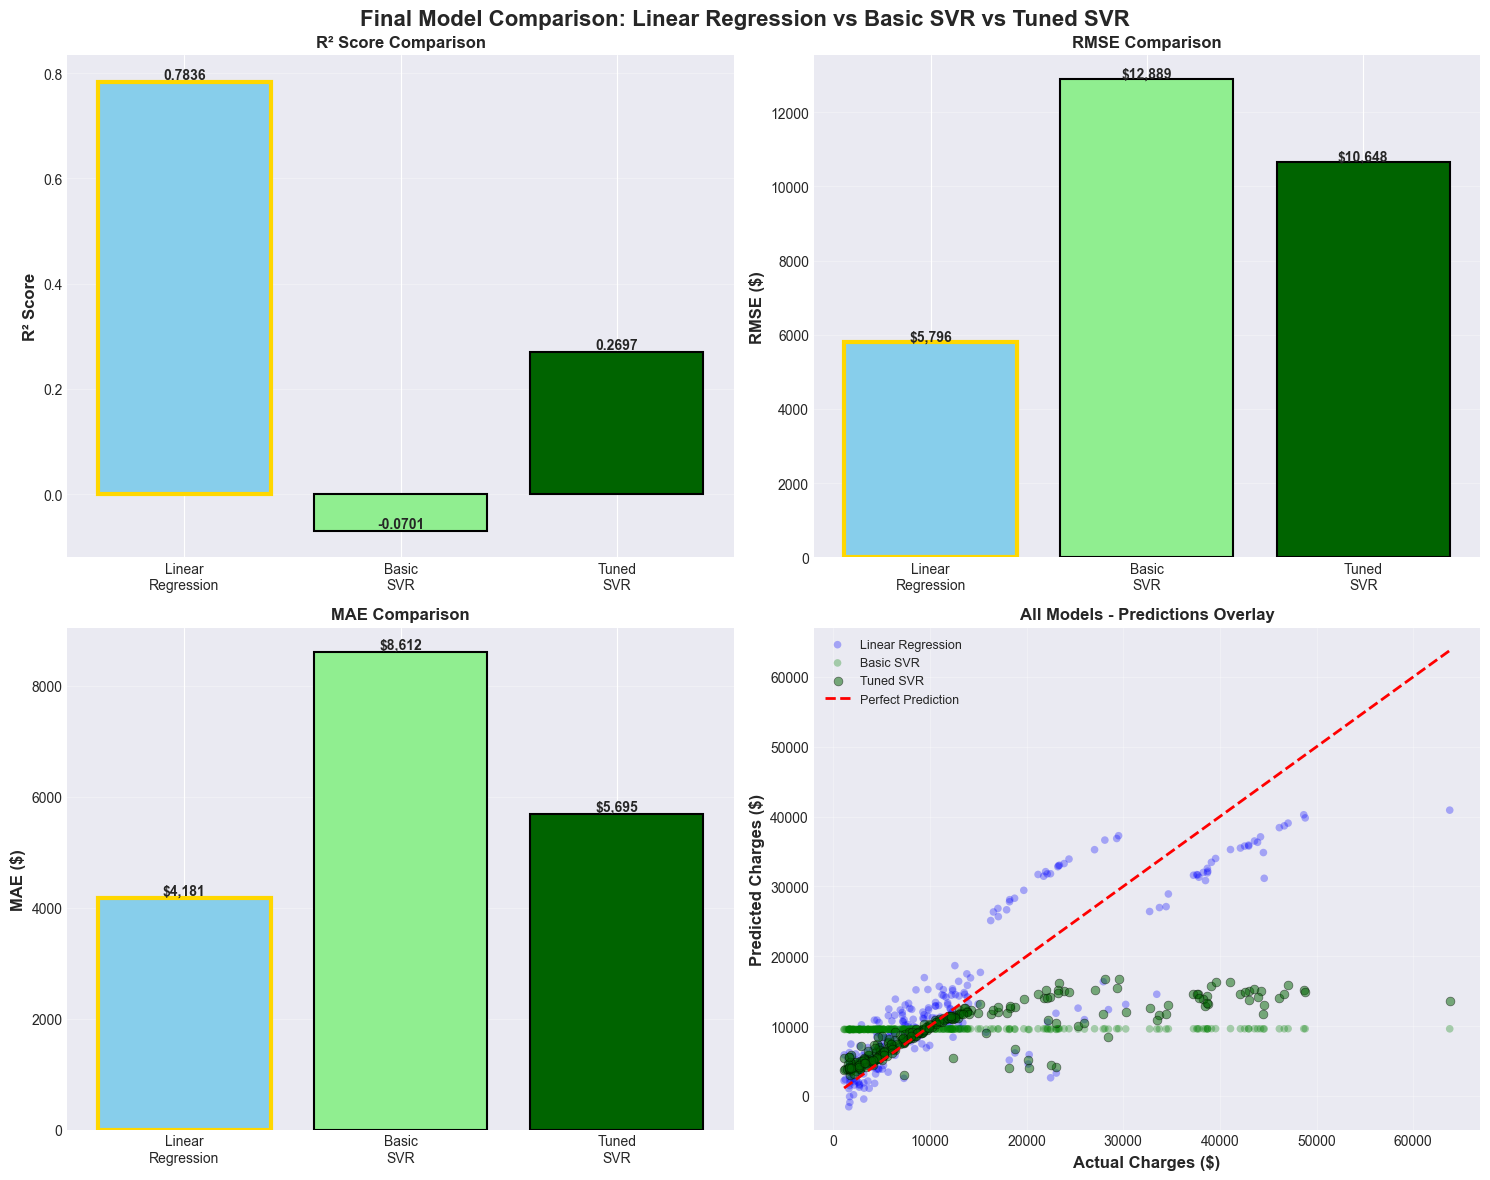

In [29]:
# Create final comprehensive comparison
print("=" * 90)
print("FINAL MODEL COMPARISON: ALL THREE MODELS")
print("=" * 90)

# Create comparison DataFrame
final_comparison = {
    "Metric": ["R² Score", "RMSE ($)", "MAE ($)", "Training Time", "Complexity"],
    "Linear Regression": [
        f"{r2_test_lr:.4f}",
        f"${rmse_test_lr:,.2f}",
        f"${mae_test_lr:,.2f}",
        "Very Fast",
        "Low",
    ],
    "Basic SVR": [
        f"{r2_test_svr:.4f}",
        f"${rmse_test_svr:,.2f}",
        f"${mae_test_svr:,.2f}",
        "Moderate",
        "Medium",
    ],
    "Tuned SVR": [
        f"{r2_test_tuned:.4f}",
        f"${rmse_test_tuned:,.2f}",
        f"${mae_test_tuned:,.2f}",
        "Slow (Grid Search)",
        "High",
    ],
}

final_df = pd.DataFrame(final_comparison)
print("\n" + final_df.to_string(index=False))

# Visualize final comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(
    "Final Model Comparison: Linear Regression vs Basic SVR vs Tuned SVR",
    fontsize=16,
    fontweight="bold",
)

models = ["Linear\nRegression", "Basic\nSVR", "Tuned\nSVR"]
colors = ["skyblue", "lightgreen", "darkgreen"]

# R² Comparison
r2_values = [r2_test_lr, r2_test_svr, r2_test_tuned]
bars1 = axes[0, 0].bar(
    models, r2_values, color=colors, edgecolor="black", linewidth=1.5
)
axes[0, 0].set_ylabel("R² Score", fontsize=12, fontweight="bold")
axes[0, 0].set_title("R² Score Comparison", fontsize=12, fontweight="bold")
axes[0, 0].set_ylim([min(r2_values) - 0.05, max(r2_values) + 0.05])
axes[0, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(r2_values):
    axes[0, 0].text(
        i, v + 0.005, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold"
    )
# Highlight best
best_r2_idx = np.argmax(r2_values)
bars1[best_r2_idx].set_edgecolor("gold")
bars1[best_r2_idx].set_linewidth(3)

# RMSE Comparison
rmse_values = [rmse_test_lr, rmse_test_svr, rmse_test_tuned]
bars2 = axes[0, 1].bar(
    models, rmse_values, color=colors, edgecolor="black", linewidth=1.5
)
axes[0, 1].set_ylabel("RMSE ($)", fontsize=12, fontweight="bold")
axes[0, 1].set_title("RMSE Comparison", fontsize=12, fontweight="bold")
axes[0, 1].grid(axis="y", alpha=0.3)
for i, v in enumerate(rmse_values):
    axes[0, 1].text(
        i, v + 50, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold"
    )
# Highlight best
best_rmse_idx = np.argmin(rmse_values)
bars2[best_rmse_idx].set_edgecolor("gold")
bars2[best_rmse_idx].set_linewidth(3)

# MAE Comparison
mae_values = [mae_test_lr, mae_test_svr, mae_test_tuned]
bars3 = axes[1, 0].bar(
    models, mae_values, color=colors, edgecolor="black", linewidth=1.5
)
axes[1, 0].set_ylabel("MAE ($)", fontsize=12, fontweight="bold")
axes[1, 0].set_title("MAE Comparison", fontsize=12, fontweight="bold")
axes[1, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(mae_values):
    axes[1, 0].text(
        i, v + 50, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold"
    )
# Highlight best
best_mae_idx = np.argmin(mae_values)
bars3[best_mae_idx].set_edgecolor("gold")
bars3[best_mae_idx].set_linewidth(3)

# All predictions on one plot
axes[1, 1].scatter(
    y_test,
    y_test_pred_lr,
    alpha=0.3,
    label="Linear Regression",
    color="blue",
    edgecolors="none",
    s=30,
)
axes[1, 1].scatter(
    y_test,
    y_test_pred_svr,
    alpha=0.3,
    label="Basic SVR",
    color="green",
    edgecolors="none",
    s=30,
)
axes[1, 1].scatter(
    y_test,
    y_test_pred_tuned,
    alpha=0.5,
    label="Tuned SVR",
    color="darkgreen",
    edgecolors="black",
    linewidth=0.5,
    s=40,
)
axes[1, 1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[1, 1].set_xlabel("Actual Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_ylabel("Predicted Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_title("All Models - Predictions Overlay", fontsize=12, fontweight="bold")
axes[1, 1].legend(loc="upper left", fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()